# 学号 3220221151 姓名 甄烨炜
## 数据集Alzheimer Disease and Healthy Aging Data in US

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from math import isnan
import math

In [2]:
path = 'D:/archive/'
data = pd.read_csv(path+'Alzheimer Disease and Healthy Aging Data In US.csv',index_col=0)
#data.head()#默认展示前五行数据

C:\Users\A\AppData\Local\Temp\ipykernel_11548\3997661492.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path+'Alzheimer Disease and Healthy Aging Data In US.csv',index_col=0)


In [3]:
#查看属性类型
data.dtypes

YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Class                         object
Topic                         object
Question                      object
Data_Value_Unit               object
DataValueTypeID               object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit          object
High_Confidence_Limit         object
Sample_Size                  float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
Geolocation                   object
ClassID                       object
TopicID                       object
QuestionID                    object
LocationID                     int64
StratificationCategoryID1     object
StratificationID1             object
StratificationCategoryID2     object
S

# 数据摘要

In [4]:
# 对每个标称属性列进行频次统计
for column in data.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(pd.value_counts(data[column]))
    print("\n")

Column: LocationAbbr
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR      2797
GU      2703
VI       503
Name: LocationAbbr, dtype: int64


Column: LocationDesc
United States, DC & Territories    4644
West                               4638
Northeast                          4614
Midwest                            4

AGE    214462
Name: StratificationCategoryID1, dtype: int64


Column: StratificationID1
AGE_OVERALL    71919
5064           71528
65PLUS         71015
Name: StratificationID1, dtype: int64


Column: StratificationCategoryID2
RACE       134959
GENDER      51834
OVERALL     27669
Name: StratificationCategoryID2, dtype: int64


Column: StratificationID2
OVERALL    27669
WHT        27633
HIS        27525
BLK        26968
NAA        26571
ASN        26262
FEMALE     26091
MALE       25743
Name: StratificationID2, dtype: int64




In [5]:
#数值属性，给出5数概括及缺失值的个数
for column in data.select_dtypes(include=['number']).columns:
    print(f"Column:{column}")
    print(data[column].describe())
    print(f"缺失值个数:{data[column].isna().sum()}")
    print("\n")

Column:YearEnd
count    214462.000000
mean       2017.634000
std           1.778926
min        2015.000000
25%        2016.000000
50%        2018.000000
75%        2019.000000
max        2020.000000
Name: YearEnd, dtype: float64
缺失值个数:0


Column:Data_Value
count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value, dtype: float64
缺失值个数:69833


Column:Data_Value_Alt
count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value_Alt, dtype: float64
缺失值个数:69833


Column:Sample_Size
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Sample_Size, dtype: float64
缺失值个数:214462


Column:LocationID
count    214462.000000
mean        800.987821
std        2512.934

In [6]:
#通过对数值列的描述发现sample_size列全部缺失，于是删除此列
data= data.dropna(axis=1, how='all')
#data.head()

# 数据可视化
## 使用直方图、盒图等检查数据分布及离群点

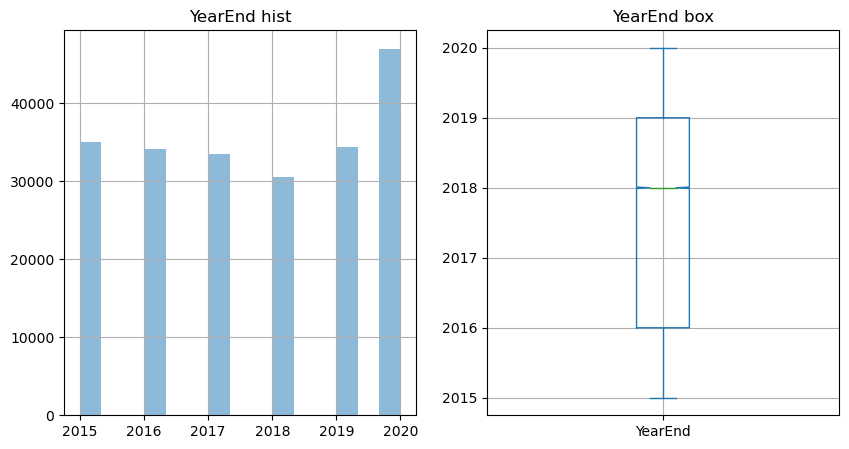

In [7]:
# 绘制YearEnd属性列的盒图
# coding=utf-8
plt.figure(figsize = (10,5))
#直方图
plt.subplot(1,2,1)
plt.title("YearEnd hist")
data['YearEnd'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(1,2,2)
plt.title("YearEnd box")
data['YearEnd'].plot(kind='box',notch=True,grid=True)

plt.show()

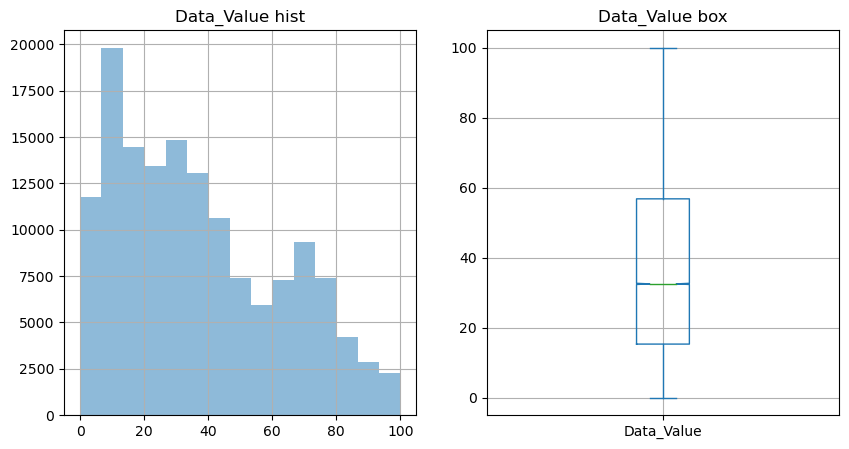

In [8]:
# 绘制Data_Value属性列的盒图
# coding=utf-8
plt.figure(figsize = (10,5))
#直方图
plt.subplot(1,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(1,2,2)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',notch=True,grid=True)
plt.show()

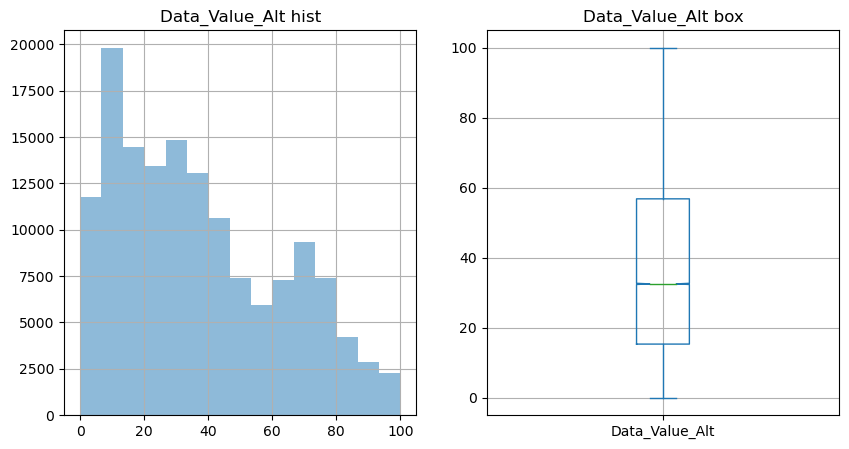

In [9]:
# 绘制Data_Value_Alt属性列的盒图
# coding=utf-8
plt.figure(figsize = (10,5))
#直方图
plt.subplot(1,2,1)
plt.title("Data_Value_Alt hist")
data['Data_Value_Alt'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(1,2,2)
plt.title("Data_Value_Alt box")
data['Data_Value_Alt'].plot(kind='box',notch=True,grid=True)
plt.show()

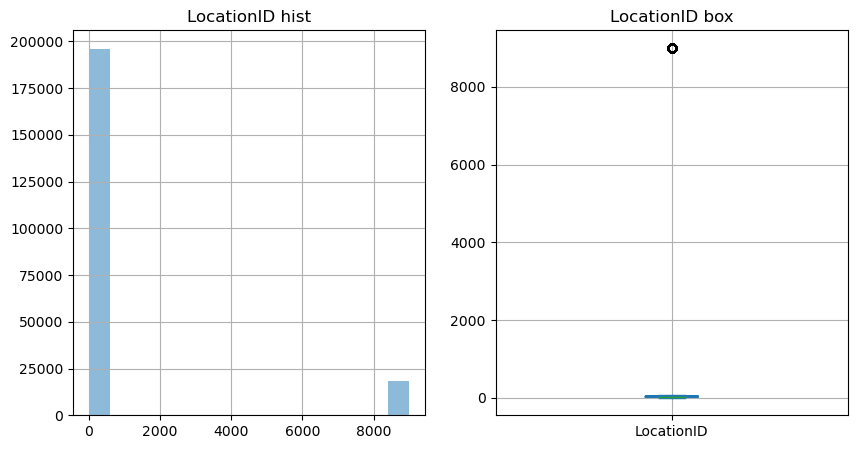

In [10]:
#LocationID
plt.figure(figsize = (10,5))
#直方图
plt.subplot(1,2,1)
plt.title("LocationID hist")
data['LocationID'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(1,2,2)
plt.title("LocationID box")
data['LocationID'].plot(kind='box',notch=True,grid=True)

plt.show()

可以看出YearEnd呈均匀分布，Data_Value_Alt与Data_Value分布相同都为偏态分布，这三个属性都无离群值点
而LocationID呈单峰分布，且有离群值点

# 数据缺失的处理

In [11]:
#缺失数据的列
# 检查每一列是否包含缺失值
has_missing = data.isnull().any()
# 返回所有包含缺失值的列名列表
cols_with_missing = data.columns[has_missing].tolist()
print("Columns with missing values:")
print(cols_with_missing)
print(data[cols_with_missing ].dtypes)

Columns with missing values:
['Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'StratificationCategory2', 'Stratification2', 'Geolocation']
Data_Value                 float64
Data_Value_Alt             float64
Low_Confidence_Limit        object
High_Confidence_Limit       object
StratificationCategory2     object
Stratification2             object
Geolocation                 object
dtype: object


In [12]:
#从五值描述和盒图、箱线图看该两列Data_Value和Data_Value_Alt可能相同
# 比较两列是否完全相同
result = data['Data_Value'].equals(data['Data_Value_Alt'])
print(result)

True


比较完全相同，故以下缺失值处理仅展示Data_Value

Original five number summary:
count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value, dtype: float64

Modified five number summary:
count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value, dtype: float64


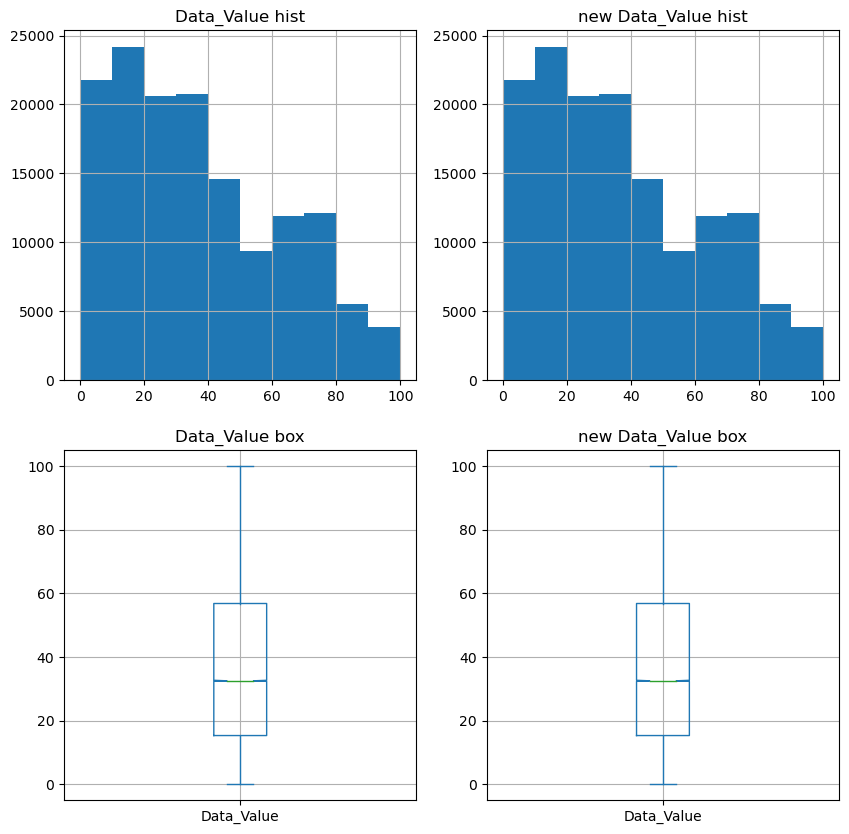

In [13]:
#剔除缺失值
#剔除缺失部分
del_null_data = data.copy(deep=True)
del_null_data = del_null_data.dropna(subset=['Data_Value'])
# 输出修改前后 Data_Value 列的五值描述
print("Original five number summary:")
print(data['Data_Value'].describe())

print("\nModified five number summary:")
print(del_null_data['Data_Value'].describe())
# Data_Value 可视化对比新旧数据
plt.figure(figsize = (10,10))
#直方图
plt.subplot(2,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist() 
#直方图
plt.subplot(2,2,2)
plt.title("new Data_Value hist")
del_null_data['Data_Value'].hist() 

#盒图
plt.subplot(2,2,3)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',notch=True,grid=True)
#盒图
plt.subplot(2,2,4)
plt.title("new Data_Value box")
del_null_data['Data_Value'].plot(kind='box',notch=True,grid=True)

plt.show()

可以看出剔除缺失值分布没有发生变化

Original five number summary:
count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value, dtype: float64

Modified five number summary:
count    214462.000000
mean         27.136405
std          25.365139
min           0.000000
25%           6.000000
50%          15.900000
75%          42.100000
max         100.000000
Name: Data_Value, dtype: float64


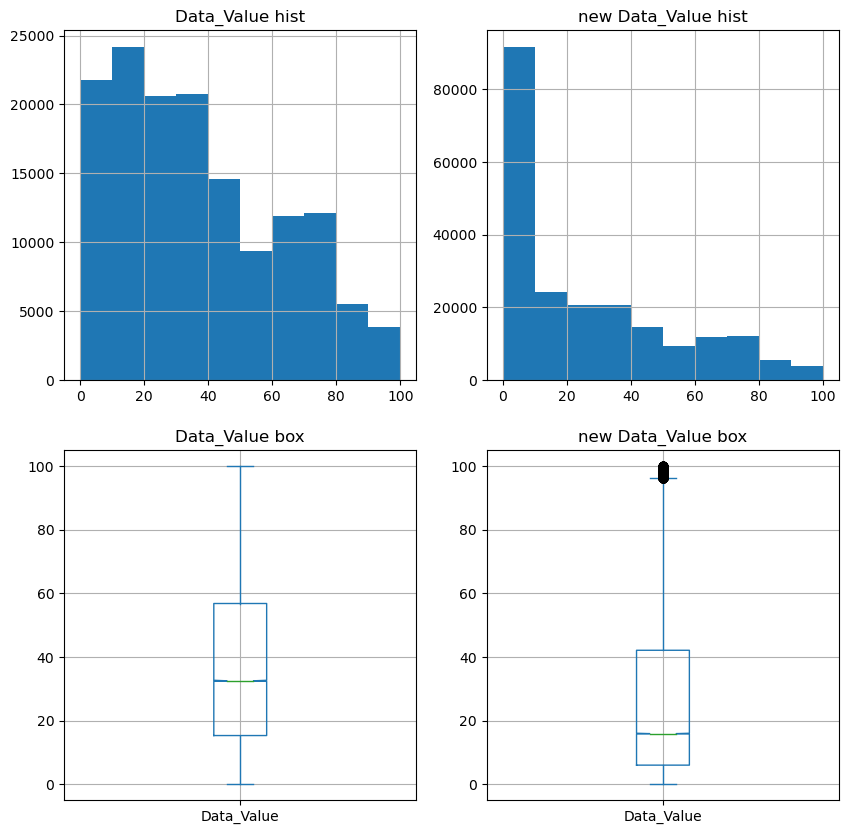

In [14]:
#用最高频率值来填补缺失值
fill_data_with_most_frequency = data.copy(deep=True)
#对'Data_Value'进行最高频率值填补缺失值
mode_value = fill_data_with_most_frequency['Data_Value'].mode()[0]
# 将 Data_Value列的缺失值填充为最高频率值
fill_data_with_most_frequency['Data_Value'].fillna(mode_value, inplace=True)
# 输出修改前后 Data_Value 列的五值描述
print("Original five number summary:")
print(data['Data_Value'].describe())

print("\nModified five number summary:")
print(fill_data_with_most_frequency['Data_Value'].describe())
# Data_Value可视化对比新旧数据
plt.figure(figsize = (10,10))
#直方图
plt.subplot(2,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist() 
#直方图
plt.subplot(2,2,2)
plt.title("new Data_Value hist")
fill_data_with_most_frequency['Data_Value'].hist() 

#盒图
plt.subplot(2,2,3)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',notch=True,grid=True)
#盒图
plt.subplot(2,2,4)
plt.title("new Data_Value box")
fill_data_with_most_frequency['Data_Value'].plot(kind='box',notch=True,grid=True)

plt.show()

由于最高频值较小，所以用最高频值填充后，取值较小范围内（0-10区间）的数值变多，25%、50%、75%分位数都变小了，很多较大的值成为了离群点。

In [15]:
#通过相似属性填充
#通过属性的相关关系来填补缺失值
data.corr()

C:\Users\A\AppData\Local\Temp\ipykernel_11548\1743315043.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,YearEnd,Data_Value,Data_Value_Alt,LocationID
YearEnd,1.000000,0.010573,0.010573,0.003154
Data_Value,0.010573,1.000000,1.000000,-0.012051
Data_Value_Alt,0.010573,1.000000,1.000000,-0.012051
LocationID,0.003154,-0.012051,-0.012051,1.000000


C:\Users\A\AppData\Local\Temp\ipykernel_11548\1674704697.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Data_Value'] = lr.predict(test[['LocationID']])


填充前 Data_Value 五值描述统计量：
count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value, dtype: float64

填充后 Data_Value 五值描述统计量：
count    214462.000000
mean         37.377959
std          20.680535
min           0.000000
25%          23.800000
50%          37.455874
75%          42.100000
max         100.000000
Name: Data_Value, dtype: float64


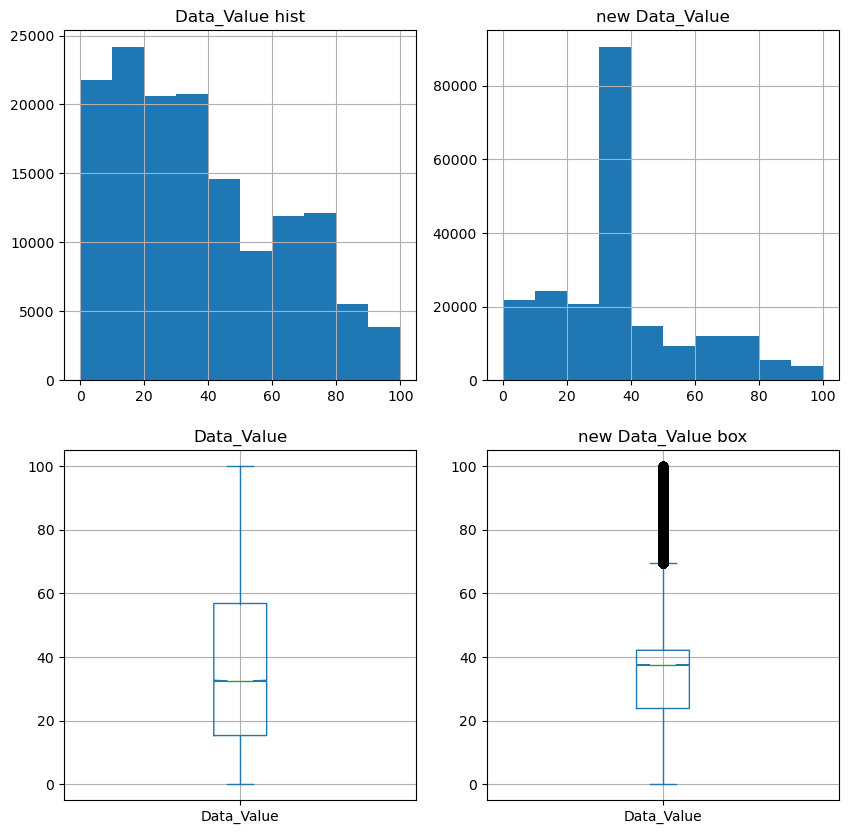

In [16]:
#由于Data_Value_Alt取值和缺失部分与Data_Value一样，所以选择相关系数绝对值第二大的LocationID作为相关属性进行填充
# 深拷贝 data
data_corr =data.copy(deep=True)

# 训练集：Data_Value和id非缺失值的部分
train = data_corr.loc[(~data_corr['Data_Value'].isna()) & (~data_corr['LocationID'].isna())]

# 测试集：IMDb-rating为缺失值的部分
test = data_corr.loc[data_corr['Data_Value'].isna()]

# 线性回归填充缺失值
from sklearn.linear_model import LinearRegression

# 构建线性回归模型
lr = LinearRegression()
lr.fit(train[['LocationID']], train['Data_Value'])

# 预测 IMDb-rating 缺失值
test['Data_Value'] = lr.predict(test[['LocationID']])

# 合并训练集和填充后的测试集
data_corr = pd.concat([train, test])
# 对比五值描述统计量
print("填充前 Data_Value 五值描述统计量：")
print(data['Data_Value'].describe())
print("\n填充后 Data_Value 五值描述统计量：")
print(data_corr['Data_Value'].describe())

# Data_Value 可视化对比新旧数据
plt.figure(figsize = (10,10))
#直方图
plt.subplot(2,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist() 
#直方图
plt.subplot(2,2,2)
plt.title("new Data_Value")
data_corr['Data_Value'].hist() 

#盒图
plt.subplot(2,2,3)
plt.title("Data_Value")
data['Data_Value'].plot(kind='box',notch=True,grid=True)
#盒图
plt.subplot(2,2,4)
plt.title("new Data_Value box")
data_corr['Data_Value'].plot(kind='box',notch=True,grid=True)

plt.show()

该填充方法同样使Data_Value出现较多离群点，取值在某一小范围内的Data_Value变多，25%、50%、75%分位数都变小了，box变短。

In [19]:
#通过数据对象之间的相似性来填补缺失值
# 找出不含缺失值的行
data_object_corr =data.copy(deep=True)
complete_data = data_object_corr.dropna(subset=['Data_Value'])
#选取几个有代表性的属性
nominal_cols=['Class','StratificationID1','StratificationID2','ClassID','TopicID','QuestionID']
# 计算每行与当前行的相同标称属性个数，具有相同属性最多的行视为最相似对象
def get_same_attr_count(row):
    count = 0
    closest_row = complete_data.iloc[0] # 假设第一行就是最接近的行
    for _, complete_row in complete_data.iterrows():
        if row.name != complete_row.name:
            same_attr_count = sum(complete_row[nominal_cols] == row[nominal_cols])
            if same_attr_count > count:
                count = same_attr_count
                closest_row = complete_row
    return closest_row['Data_Value']

# 用相同属性最多的行的 Data_Value 值填充缺失值
for _, row in data.iterrows():
    if pd.isnull(row['Data_Value']):
        data_object_corr.loc[row.name, 'Data_Value'] = get_same_attr_count(row)

KeyboardInterrupt: 

In [ ]:
# 对比五值描述统计量
print("填充前 IMDb-rating 五值描述统计量：")
print(data['Data_Value'].describe())
print("\n填充后 Data_Value 五值描述统计量：")
print(data_object_corr['Data_Value'].describe())

# Data_Value 可视化对比新旧数据
plt.figure(figsize = (10,10))
#直方图
plt.subplot(2,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist() 
#直方图
plt.subplot(2,2,2)
plt.title("new Data_Value hist")
data_object_corr['Data_Value'].hist() 

#盒图
plt.subplot(2,2,3)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',notch=True,grid=True)
#盒图
plt.subplot(2,2,4)
plt.title("new Data_Value box")
data_object_corr['Data_Value'].plot(kind='box',notch=True,grid=True)

plt.show()